In [1]:
using CSV
using DataFrames
using Plots

In [2]:
data = DataFrame(CSV.File("land_global_temperature_anomaly-1880-2016.csv"));

In [3]:
describe(data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Year,1948.0,1880,1948.0,2016,0,Int64
2,Value,0.0526277,-0.6,-0.05,1.45,0,Float64


In [4]:
data

,Year,Value
,Int64,Float64
1,1880,-0.47
2,1881,-0.45
3,1882,-0.41
4,1883,-0.6
5,1884,-0.6
6,1885,-0.52
7,1886,-0.48
8,1887,-0.47
9,1888,-0.46


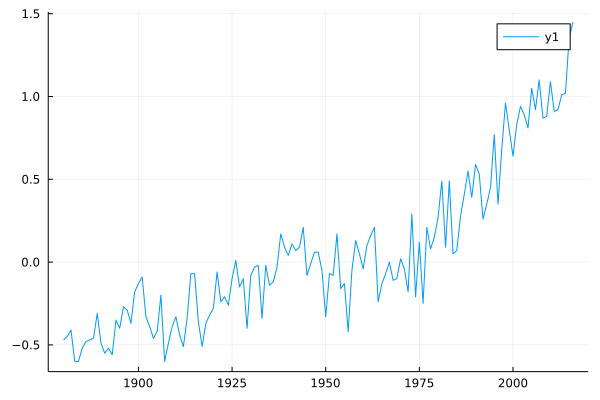

In [5]:
plot(data.Year,data.Value) 

In [6]:
año, temperatura = data.Year, data.Value

([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889  …  2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], [-0.47, -0.45, -0.41, -0.6, -0.6, -0.52, -0.48, -0.47, -0.46, -0.31  …  1.1, 0.87, 0.88, 1.09, 0.91, 0.92, 1.01, 1.02, 1.35, 1.45])

In [7]:
temperatura

137-element Vector{Float64}:
 -0.47
 -0.45
 -0.41
 -0.6
 -0.6
 -0.52
 -0.48
 -0.47
 -0.46
 -0.31
 -0.49
 -0.55
 -0.52
  ⋮
  1.05
  0.92
  1.1
  0.87
  0.88
  1.09
  0.91
  0.92
  1.01
  1.02
  1.35
  1.45

In [8]:
# Tenemos todos los datos
#  ahora tratemos de hacer una regresion usando cuadrados minimos# 

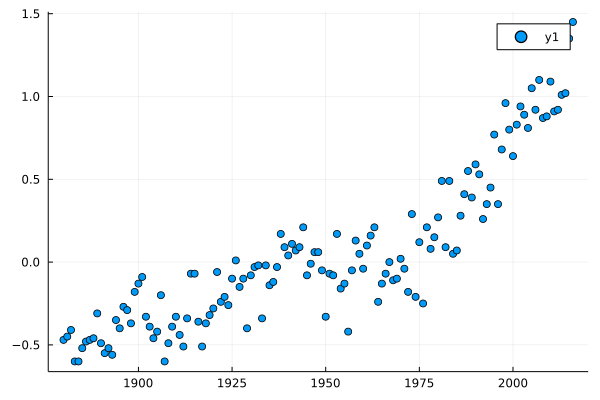

In [9]:
scatter(año,temperatura)

In [10]:
length(año)

137

In [11]:
M = [length(año)  sum(año); sum(año)  sum(año .^ 2)]
c = [sum(temperatura); sum(año .* temperatura)]

βsol = M \ c

2-element Vector{Float64}:
 -20.148685384654943
   0.010370283943470853

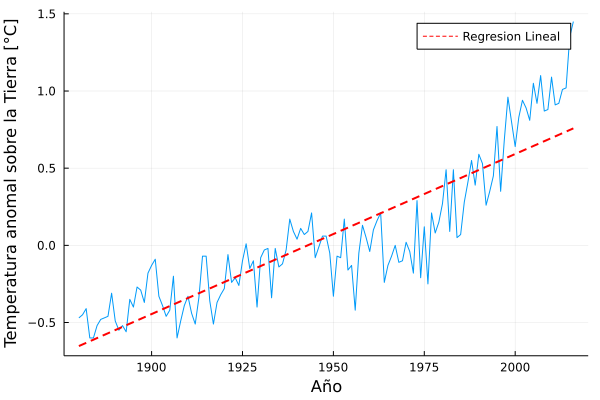

In [16]:
plot(año,temperatura,label="")
plot!(año -> βsol[1] + βsol[2] * año, extrema(año)..., c=:red, lw=2,label="Regresion Lineal",line=:dash)
#tittle!("")
xlabel!("Año")
ylabel!("Temperatura anomal sobre la Tierra [°C]")